# IT326: Data mining project
# Phase#1:

## Project Objectives: 

The primary goal of this project is to analyze and predict students' adaptability levels in online education using both classification and clustering techniques. The classification model aims to accurately predict a student's adaptability level based on various factors such as age, education level, and access to resources. Additionally, clustering techniques will be used to group students with similar adaptability patterns, allowing us to explore hidden segments within the data and better understand different student groups’ responses to online learning environments.

## Source of the Dataset: 
Kaggle Platform Dataset link: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

**Read dataset** 

In [270]:
import pandas as pd

df = pd.read_csv('Dataset/students_adaptability_level_online_education.csv')

## General information about the dataset:

- Number of Attributes: 14

- Number of Objects: 1205 (students)

- Class Name: Adaptivity Level

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


## Type of Attributes:

| Attributes Name | Data type | Description | Possible Values |
|----------|----------|----------|----------|
| Gender | Binary | Student's gender type | Girl, Boy |
| Age | Ordinal | Student's age range | 1-5, 6-10, 11-15, 16-20, 21-25, 26-30 |
| Education Level | Nominal | Student's education institution level | School, College, University |
| Institution Type | Binary | Student's education institution type | Government, Non Government |
| IT Studen | Binary | Whether the student is studying IT or not | Yes, No |
| Location | Binary | Whether the student is studying in their hometown | Yes, No |
| Load-shedding | Binary | Level of load shedding | High, Low |
| Financial Condition | Ordinal | Student's family's financial condition | Rich, Mid, Poor |
| Internet Type | Binary | Student's most used internet type | Wifi, Mobile Data |
| Network Type | Ordinal | Network connectivity type | 2G, 3G, 4G |
| Class Duration | Ordinal | Student's daily class duration in hours | 0, 1-3, 3-6 |
| Self Lms | Binary | Whether the student's institution has its own LMS | Yes, No |
| Device | Nominal | Student's most used device in class | Computer, Tab, Mobile |
| Adaptivity Level | Ordinal | Student's adaptibility level to online education | High, Moderate, Low |

# Phase#2:

### Loading the dataset and Import libraries:

In [272]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('Dataset/students_adaptability_level_online_education.csv')
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


1- Sample of dataset:

In [273]:
sample_data = df.sample(n=20);
sample_data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
959,Girl,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
312,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate
998,Girl,11-15,School,Government,No,Yes,Low,Rich,Wifi,4G,1-3,No,Mobile,Low
1163,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-6,No,Mobile,Moderate
136,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
601,Girl,21-25,University,Government,No,Yes,Low,Poor,Mobile Data,4G,0,No,Mobile,Low
174,Boy,11-15,School,Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
822,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
271,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Mobile,Moderate
703,Girl,1-5,School,Government,No,Yes,Low,Rich,Mobile Data,4G,1-3,Yes,Mobile,Low


2- Show missing value:

- We have no missing values

In [274]:
missing_values = df.isna().sum()
print("\nTotal number of missing values in the dataset:", missing_values.sum())

# Creates a table that counts the number of missing values for each variable in the dataset
print("\nMissing Values:")
missing_table = pd.DataFrame({'Variable': missing_values.index, 'Missing Values': missing_values.values})
display(missing_table)


Total number of missing values in the dataset: 0

Missing Values:


,Variable,Missing Values
0,Gender,0
1,Age,0
2,Education Level,0
3,Institution Type,0
4,IT Student,0
5,Location,0
6,Load-shedding,0
7,Financial Condition,0
8,Internet Type,0
9,Network Type,0


3- Statistical summary:

- first convert age values ​​to numerical instead of ordinal:

Converting the 'Age' column to numeric values is essential for the data transformation step in the project. It ensures that the data can be effectively used in later stages such as feature selection, classification, and clustering. Additionally, numeric values allow you to calculate important statistical measures like mean, variance, and standard deviation, which are required to understand the data distribution and are crucial for numeric attributes.

In [275]:
def interval_to_midpoint(interval):
    # Split the interval by the dash (e.g., "1-5" becomes ["1", "5"])
    lower, upper = map(int, interval.split('-'))
    # Calculate the midpoint
    return (lower + upper) // 2

# Apply the conversion function to the 'age' column
df['Age'] = df['Age'].apply(interval_to_midpoint)

# Now, the 'age' column should contain numerical midpoints
print("Age values after converting it:\n")
print(df['Age'])

Age values after converting it:

0       23
1       23
2       18
3       13
4       18
        ..
1200    18
1201    18
1202    13
1203    18
1204    13
Name: Age, Length: 1205, dtype: int64


In [276]:
df.describe()

,Age
count,1205.000000
mean,17.219917
std,6.285479
min,3.000000
25%,13.000000
50%,18.000000
75%,23.000000
max,28.000000


- Count: This tells us there are 1,205 entries in the 'Age' column. Every data point in this column has a value, so there are no missing values.

- Mean: The average age, after converting the intervals to midpoints, is 17.22. This value provides a central tendency, representing the "typical" age of individuals in the dataset.

- Standard Deviation (std): The standard deviation is 6.29, which indicates how much the ages vary from the mean. A higher standard deviation would mean a wider spread of ages around the mean, while a lower value would suggest that the ages are closer to the average.

- Minimum (min): The youngest age midpoint in the dataset is 3. This likely represents individuals in the youngest age range (such as "1-5").

- 1st Quartile (25%): At the 25th percentile, the value is 13. This means that 25% of the individuals have an age midpoint of 13 or younger. It gives us a sense of the lower quarter of the age distribution.

- Median (50%): The median age, or the value that lies in the middle of the dataset, is 18. Half of the individuals are younger than 18, and half are older. This is a robust measure of central tendency, less affected by extreme values compared to the mean.

- 3rd Quartile (75%): At the 75th percentile, the value is 23. This indicates that 75% of the individuals have an age midpoint of 23 or younger, and 25% are older. It shows the upper range of typical ages.

- Maximum (max): The oldest age midpoint in the dataset is 28. This represents the oldest individuals in the dataset, corresponding to the highest age range (like "26-30").

These statistics help summarize the distribution of ages, showing both central tendencies (mean and median) and the spread (standard deviation, quartiles, and extremes).

In [277]:
# Calculate the variance of the 'Age' column
age_variance = df['Age'].var()
print("Variance of Age:", age_variance)

# Calculate the median of the 'Age' column
median_value = df["Age"].median()
print("Median of Age:", median_value)

# Calculate the mode of the 'Age' column
mode_result = df["Age"].mode()
print("Mode of Age:", mode_result)

Variance of Age: 39.50724417915386
Median of Age: 18.0
Mode of Age: 0    23
Name: Age, dtype: int64


- Variance of Age: The variance measures how much the ages are spread out from the mean. A higher variance indicates more variability, while a lower variance means that the ages are closer to the mean.

- Median of Age: The median is the middle value when all ages are ordered from smallest to largest. It's a robust measure of central tendency, less affected by outliers. If the median is close to the mean, it suggests a symmetric distribution. In your case, if the median was 18 (as we saw earlier), it represents the central age around which most of the data lies.

- Mode of Age: The mode represents the most frequent age in the dataset. If there is a single value that occurs most often, it shows where the data is concentrated. For example, if the mode is a specific age range midpoint, it tells you that this age range is the most common among your data.

### Graphs:

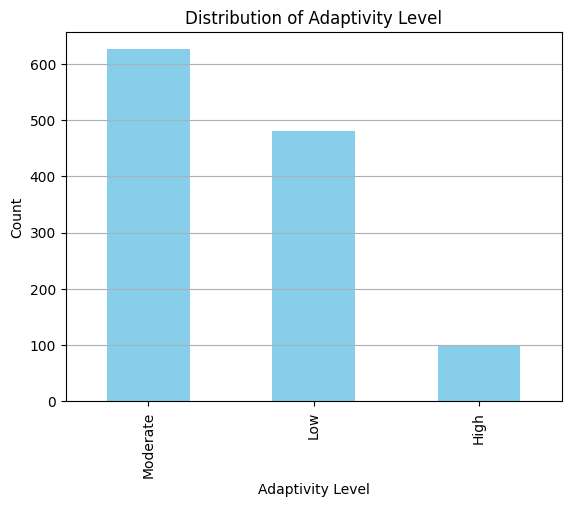

In [278]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Dataset/students_adaptability_level_online_education.csv')

# Bar Plot - Distribution of Adaptivity Level
plt.figure()
data['Adaptivity Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Adaptivity Level')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()




This bar plot displays the distribution of students' adaptability levels to online education. The x-axis represents different adaptability levels: Low, Moderate, and High, while the y-axis shows the number of students in each category. This visualization helps in understanding how students are coping with the transition to online learning, highlighting which adaptability level is the most common among them.



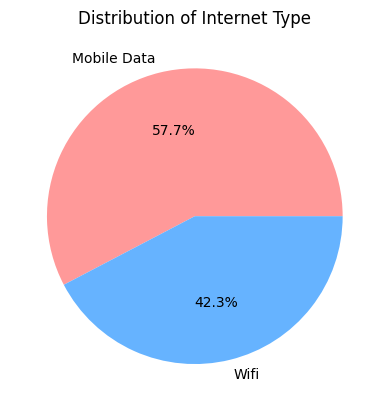

In [279]:
plt.figure()
data['Internet Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Internet Type')
plt.ylabel('')  # Remove y-label for a cleaner pie chart
plt.show()


This pie chart shows the distribution of internet types used by students for online education. The percentages inside the chart represent the proportion of each internet type (e.g., WiFi, Mobile Data) relative to the total number of students. This chart helps to identify the most common type of internet connection among students.

<Figure size 640x480 with 0 Axes>

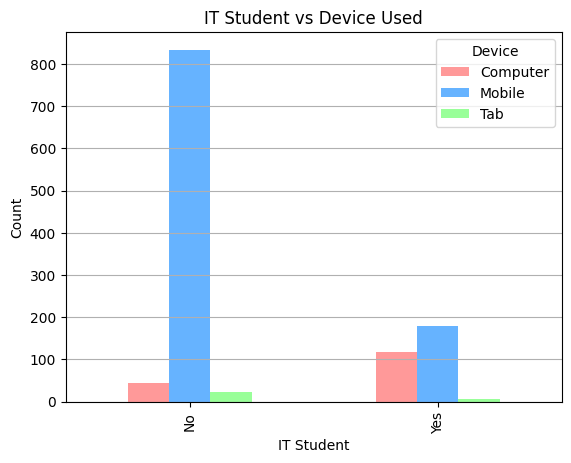

In [280]:
plt.figure()
pd.crosstab(data['IT Student'], data['Device']).plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'])
plt.title('IT Student vs Device Used')
plt.xlabel('IT Student')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


This bar chart illustrates the relationship between being an IT student and the device used during studies. The x-axis represents whether the student is specialized in IT or not, while the y-axis shows the number of students using each type of device (e.g., smartphones or computers). This chart highlights the most commonly used devices among both IT and non-IT students.

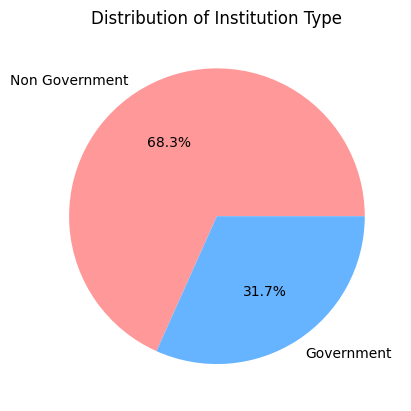

In [281]:
plt.figure()
data['Institution Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Institution Type')
plt.ylabel('') 
plt.show()


This pie chart illustrates the distribution of the type of institution where students are enrolled. The percentages inside the chart represent the proportion of students in government versus non-government institutions. This chart helps identify the most common type of institution among students.

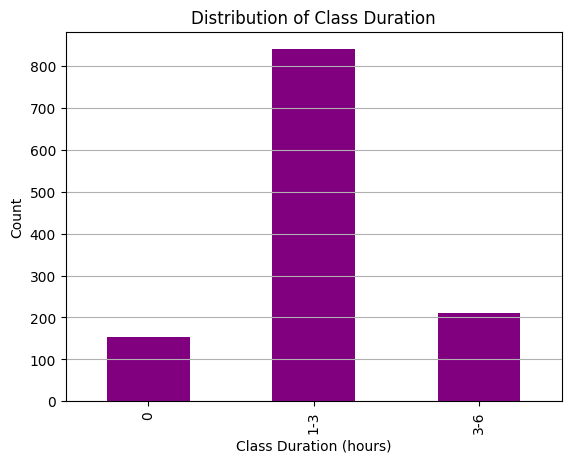

In [282]:
plt.figure()
data['Class Duration'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Class Duration')
plt.xlabel('Class Duration (hours)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


This bar chart shows the distribution of class durations attended by students in online education. The x-axis represents different class durations (in hours), while the y-axis shows the number of students attending each duration. This chart helps to understand the most common class duration among students.

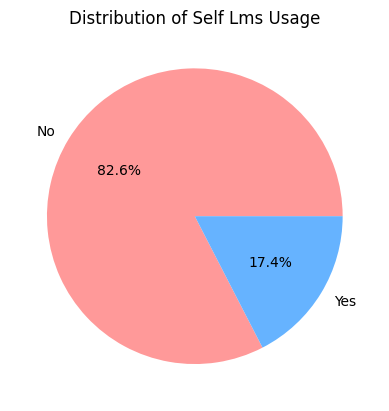

In [283]:
plt.figure()
data['Self Lms'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Self Lms Usage')
plt.ylabel('')  # Remove y-label for a cleaner pie chart
plt.show()


This pie chart shows the distribution of students' use of self-learning management systems (Self Lms). The percentages inside the chart represent the proportion of students who use self-learning systems compared to those who do not. This chart helps in understanding the extent to which students rely on self-learning systems in their studies.

<Figure size 640x480 with 0 Axes>

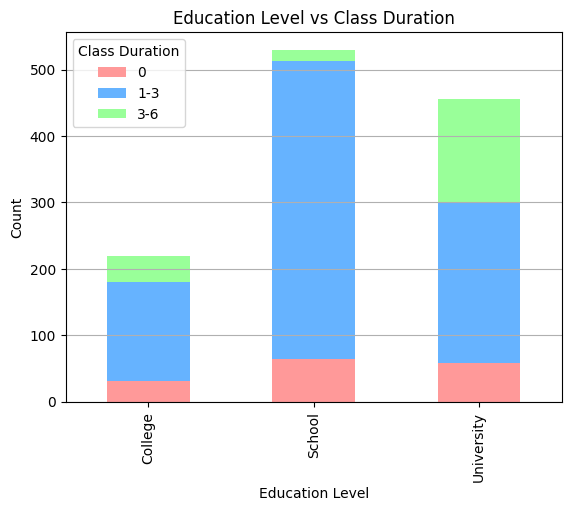

In [284]:
plt.figure()
pd.crosstab(data['Education Level'], data['Class Duration']).plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Education Level vs Class Duration')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


This stacked bar chart illustrates the relationship between education level and class duration. The x-axis represents different education levels (such as school, college, university), while the y-axis shows the number of students attending classes of different durations. This chart helps in understanding the distribution of class durations across various education levels.

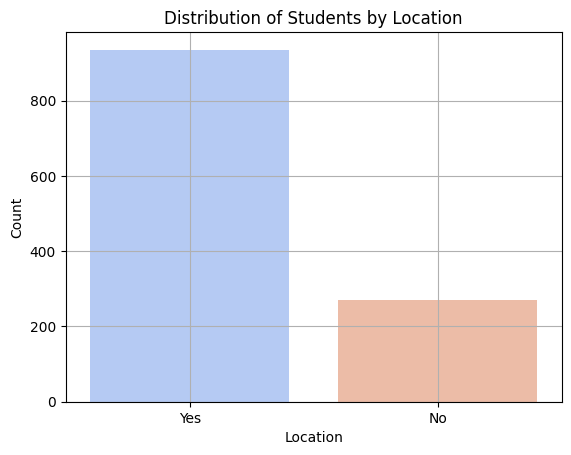

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(data=data, x='Location', palette='coolwarm')
plt.title('Distribution of Students by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The bar chart shows the distribution of students based on whether they are studying in their hometown or not. The x-axis represents two options ("Yes" and "No"), while the y-axis displays the number of students in each category.

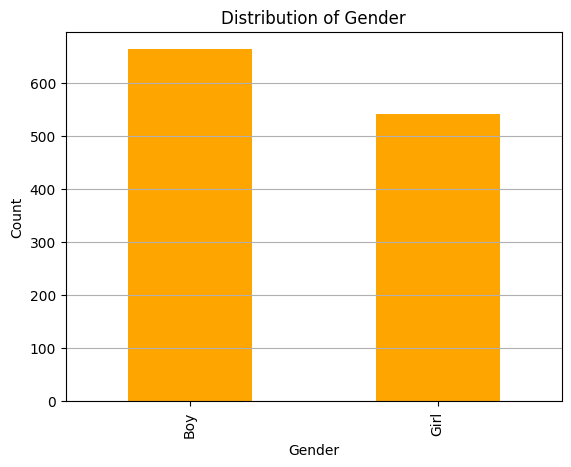

In [286]:
plt.figure()
data['Gender'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


This bar chart shows the distribution of students by gender. The x-axis represents gender (Male or Female), while the y-axis displays the number of students in each category. This chart provides an overview of the numerical distribution of genders in the student group.

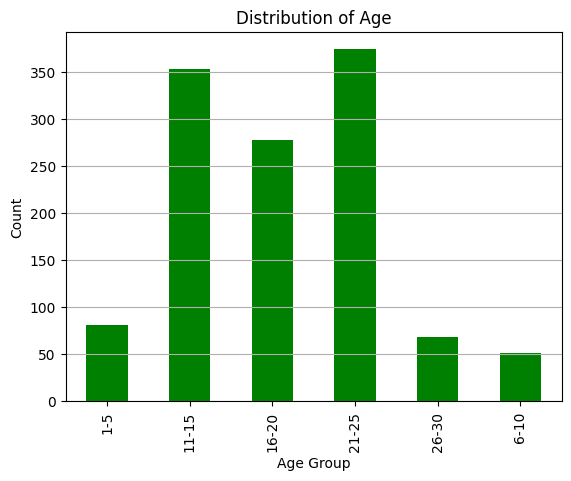

In [287]:
plt.figure()
data['Age'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


This bar chart illustrates the distribution of students' age groups. The x-axis represents the different age groups, while the y-axis shows the number of students in each age group. This chart helps to show the overall age distribution among students and identify the most common age group.

### Data Cleaning:
1- Removing duplicates:

- First, we count the number of duplicates rows, and then we remove them:

In [288]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates , "\n")

df = df.drop_duplicates()
print("DataFrame after dropping all duplicate rows:\n")
print(df)
df.to_csv('Dataset/Cleaned_dataset.csv', index=False)

Number of duplicate rows: 949 

DataFrame after dropping all duplicate rows:

     Gender  Age Education Level Institution Type IT Student Location  \
0       Boy   23      University   Non Government         No      Yes   
1      Girl   23      University   Non Government         No      Yes   
2      Girl   18         College       Government         No      Yes   
3      Girl   13          School   Non Government         No      Yes   
4      Girl   18          School   Non Government         No      Yes   
...     ...  ...             ...              ...        ...      ...   
1124    Boy   23      University   Non Government        Yes       No   
1132    Boy   18         College       Government         No      Yes   
1149   Girl   18         College   Non Government         No       No   
1160    Boy   23      University   Non Government        Yes       No   
1197    Boy   23      University   Non Government        Yes      Yes   

     Load-shedding Financial Condition Intern

2- Handling Missing Values:
- there is no missing values

In [289]:
data = pd.read_csv('Dataset/Cleaned_dataset.csv');
missing_values = data.isna().sum()
print("\nTotal number of missing values in the dataset:", missing_values.sum())


Total number of missing values in the dataset: 0


3- Detect Outlier:

- Before we handle our outliers we chose the IQR method Based on our dataset to identify how many outliers in our dataset, and it shows that we do not have outliers in Age column.

In [290]:
df = pd.read_csv('Dataset/Cleaned_dataset.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any data point that lies outside of 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'Age' column: {num_outliers}")


Number of outliers in 'Age' column: 0


### Data Transmission:
1- Encoding categorical data:

In [291]:
from sklearn.preprocessing import LabelEncoder


2- Normalization:

3- discretization:

In [292]:
column_to_descretize = 'Age'
num_bins = 3

df['Discretize_'+column_to_descretize] = pd.cut(df[column_to_descretize], bins= num_bins, labels= False)

print(df[['Age', 'Descretized_Age']])

KeyError: "['Descretized_Age'] not in index"

4- aggregation

### Feature selection:
We will implement feature selection to remove redundant or irrelevant attributes from the dataset, aiming to get the smallest subset that can provide the most accurate predictions for our target classes, Adaptivity Level and Education Level. This will also reduce the time it takes for the classifier to process the data.

1- Correlation Coefficient:

We would typically use the Correlation Coefficient to assess relationships between numerical attributes, but in this case, our dataset does not contain two numerical attributes to perform this analysis.

2- Drop uncorrelated columns:

Since we only have one numerical attribute in the dataset, we cannot assess correlation between multiple numeric attributes. Therefore, there will be no need to drop any columns based on correlation, as there are no uncorrelated numerical attributes to consider. We will retain the existing numerical column.

3- Chi square 

We create a contingency table to analyze the relationship between 'Adaptivity Level' and 'Education Level', and then perform a Chi-Square test to determine if there is a significant association between these two categorical variables.

In [118]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Adaptivity Level'], df['Education Level'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Education Level   College  School  University
Adaptivity Level                             
High                    1      11          12
Low                    28      37          49
Moderate               24      33          60

Chi-Square Statistic: 6.829133397962202
Degrees of Freedom: 4
Expected Frequencies:
[[ 4.98823529  7.62352941 11.38823529]
 [23.69411765 36.21176471 54.09411765]
 [24.31764706 37.16470588 55.51764706]]


4- Feature selection


We will use Recursive Feature Elimination (RFE), which is a wrapper method for feature selection that recursively removes the least important features based on model performance.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_columns = ['Adaptivity Level', 'Education Level']

# One-hot encode categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[categorical_columns])

# Define target variable
y = df['Adaptivity Level']

# Use RFE with Logistic Regression as the underlying model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2) 
X_new = rfe.fit_transform(X_encoded, y)
# Display the selected features
selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)

Selected Features: [1, 2]
